## Identify and cleaning outliers

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

df = pd.read_excel('Datasets/dataset_comp.xlsx')

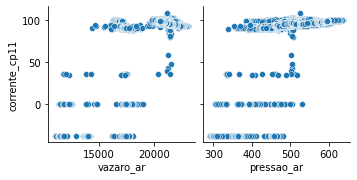

In [2]:
# As said, it's necessary to clean all data above 50 A current values

ax = sns.pairplot(df, y_vars = 'corrente_cp11', x_vars = ['vazaro_ar', 'pressao_ar'])

In [3]:
df[df['corrente_cp11'] < 50]

,Timestamp,corrente_cp11,corrente_cp12,corrente_cp13,corrente_cp31,vazaro_ar,pressao_ar
88,2021-12-01 01:28:00,-37.500000,86.199997,-37.5,90.300003,12964.529297,403.966156
89,2021-12-01 01:29:00,-37.500000,85.599998,-37.5,90.000000,12024.313477,371.473816
90,2021-12-01 01:30:00,-37.500000,85.099998,-37.5,89.300003,12115.558594,355.274200
91,2021-12-01 01:31:00,-37.500000,84.599998,-37.5,89.000000,12136.518555,343.450317
92,2021-12-01 01:32:00,-37.500000,85.000000,-37.5,89.300003,11547.508789,326.878326
...,...,...,...,...,...,...,...
39614,2021-12-28 12:14:00,35.299999,87.800003,91.0,95.500000,17408.671875,466.995575
46871,2022-01-02 13:11:00,0.000000,86.000000,13.3,91.599998,14856.537109,372.311707
46872,2022-01-02 13:12:00,-0.200000,87.000000,13.2,91.599998,13873.629883,363.001587
46873,2022-01-02 13:13:00,35.700001,86.000000,13.2,92.599998,11861.160156,335.257416


In [4]:
valor = df['corrente_cp11']

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [5]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
df_novo = df[selecao]
df_novo.head()

,Timestamp,corrente_cp11,corrente_cp12,corrente_cp13,corrente_cp31,vazaro_ar,pressao_ar
0,2021-12-01 00:00:00,96.900002,92.599998,97.000000,97.400002,21204.308594,516.897827
1,2021-12-01 00:01:00,96.900002,92.500000,97.000000,97.400002,21073.390625,516.804749
2,2021-12-01 00:02:00,96.900002,92.300003,96.900002,97.800003,21070.710938,517.828857
3,2021-12-01 00:03:00,96.800003,92.500000,97.000000,97.400002,21106.867188,518.573669
4,2021-12-01 00:04:00,97.000000,92.599998,97.199997,97.400002,21230.927734,518.759949


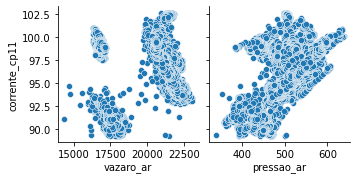

In [6]:
# Identification of the graphic pattern of the relationship between variables after removal of outliers

ax = sns.pairplot(df_novo, y_vars = 'corrente_cp11', x_vars = ['vazaro_ar', 'pressao_ar'])

In [7]:
# After modifying the database, you must save a new file for application of the templates

df_novo.to_csv('Datasets/dataset_comp.csv', sep = ';', index = False)
df_novo

,Timestamp,corrente_cp11,corrente_cp12,corrente_cp13,corrente_cp31,vazaro_ar,pressao_ar
0,2021-12-01 00:00:00,96.900002,92.599998,97.000000,97.400002,21204.308594,516.897827
1,2021-12-01 00:01:00,96.900002,92.500000,97.000000,97.400002,21073.390625,516.804749
2,2021-12-01 00:02:00,96.900002,92.300003,96.900002,97.800003,21070.710938,517.828857
3,2021-12-01 00:03:00,96.800003,92.500000,97.000000,97.400002,21106.867188,518.573669
4,2021-12-01 00:04:00,97.000000,92.599998,97.199997,97.400002,21230.927734,518.759949
...,...,...,...,...,...,...,...
61916,2022-01-12 23:56:00,99.699997,96.000000,111.000000,98.400002,20611.375000,592.868469
61917,2022-01-12 23:57:00,99.500000,95.599998,110.699997,97.800003,20561.994141,594.916626
61918,2022-01-12 23:58:00,99.599998,95.699997,110.900002,98.700005,20605.894531,594.637390
61919,2022-01-12 23:59:00,99.400002,95.599998,110.699997,98.099998,20581.210938,595.568359


##### It is observed that the pressure and current values are related in a linear way, for pressure-based failure prediction we can use the linear regression model

##### The relationship between flow and current is not linear, for this it is necessary to use a classification model the clustering to identify fahas